## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## Read in data for model
[How to read data from Google Sheets](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550)

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1bZjavzudgEnnkWcjTT-EhJJV-CLRjgB-7dAKirLWMMs/edit#gid=2085146316'
sheet_url.replace('/edit#gid=', '/export?format=csv&gid')

'https://docs.google.com/spreadsheets/d/1bZjavzudgEnnkWcjTT-EhJJV-CLRjgB-7dAKirLWMMs/export?format=csv&gid2085146316'

In [35]:
# very big dataset, so takes a few seconds to load
# if you get an HTTP 404 error, load the sheet in browser and try again
import time # see just how long it takes

sheet_url = 'https://docs.google.com/spreadsheets/d/1bZjavzudgEnnkWcjTT-EhJJV-CLRjgB-7dAKirLWMMs/edit#gid=2085146316'

t0 = time.time()
df = pd.read_csv(sheet_url.replace('/edit#gid=', '/export?format=csv&gid'))
elapsed_time = time.time() - t0

print(f"Time to load data: {elapsed_time:{.4}} seconds")
print(df.shape)
df.head()

Time to load data: 5.641 seconds
(1091, 1191)


,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,2018-03-08,3.718594,3.457253,4.562368,0.044862,2.945760,4.199607,3.028331,3.724648,4.429002,...,0.940419,1.093750,0.635217,0.460772,1.056587,0.156348,1.037322,1.469957,1.257610,0.466765
1,2018-03-09,4.522901,3.488016,2.997927,0.044862,2.187291,5.328785,3.858570,3.859563,5.073305,...,1.289443,2.337111,0.554911,0.626054,0.820090,1.126202,0.606894,1.308201,0.732345,0.975567
2,2018-03-10,6.107322,1.234070,3.085771,0.044862,2.719971,5.989625,1.741679,3.162777,4.063662,...,3.112223,3.834196,3.938322,3.936778,1.876850,3.942463,3.082432,2.434927,1.473967,3.281961
3,2018-03-11,3.873077,1.261212,6.840369,0.044862,3.189822,5.489281,1.741679,4.638495,6.471925,...,4.748849,4.101958,4.668180,4.061820,2.394439,4.565925,3.578462,3.591185,3.080530,4.589329
4,2018-03-12,5.228657,3.413127,4.470042,0.044862,3.863130,4.415463,4.612428,4.991392,4.664407,...,1.214632,0.721219,0.674600,0.515856,1.015444,0.551766,1.174367,1.354263,0.579096,0.477413


## Principal component analysis
[Pandas docs on dealing with missing values -- interpolation](https://pandas.pydata.org/docs/user_guide/missing_data.html#interpolation) \
[sklearn on imputing missing variables](https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values) \
[sklearn on PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [4]:
# remove NaN values by interpolating -- still had issues w/ PCA, so filled too
clean_df = df.interpolate(axis=0, limit_direction='both').fillna(-1)
# separate X (time) and Y (features)
X = clean_df.iloc[:,0] # date column
Y = clean_df.iloc[:,1:] # everything after date column

# convert date to datetime object
X = pd.to_datetime(X)

# normalize feature space
Y = Y / Y.max() # happens to be 10 for all if not most segments & stations

In [5]:
# initialize PCA
pca = PCA()
Y_r = pca.fit_transform(X=Y) # store as dataframe to view 

df_pca = pd.DataFrame(Y_r)
print(df_pca.shape)
df_pca.round(2).head()

(1091, 1091)


,0,1,2,3,4,5,6,7,8,9,...,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090
0,-1.16,-0.76,-0.45,0.61,-0.16,-0.06,0.09,-0.04,0.50,0.21,...,-0.0,-0.00,-0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.78,-0.81,-0.30,0.63,-0.28,-0.08,-0.48,-0.10,0.13,0.20,...,0.0,0.00,0.0,-0.01,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
2,1.83,-0.90,0.77,0.32,0.01,0.09,-0.13,0.04,-0.67,0.31,...,-0.0,-0.01,-0.0,0.00,-0.0,-0.0,-0.0,-0.0,0.0,0.0
3,2.75,-1.48,1.25,0.44,-0.01,-0.34,-0.03,0.05,0.08,0.14,...,0.0,0.00,-0.0,-0.00,0.0,0.0,-0.0,-0.0,0.0,0.0
4,-1.21,-0.73,-0.42,0.62,-0.13,-0.03,0.09,-0.02,0.51,0.20,...,0.0,-0.00,-0.0,-0.00,0.0,-0.0,-0.0,-0.0,0.0,0.0


In [6]:
# # principal weight components
# df_pca_loadings = pd.DataFrame(pca.components_)

# # mean centered data
# Y_mean = Y - Y.mean()

# print contribution of the first 10 PC's to total variance 
#        (sum across all PC's = 1)
print(pca.explained_variance_ratio_.round(2)[:10])

[0.28 0.06 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.  ]


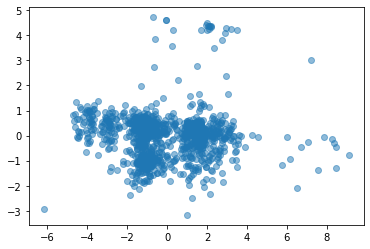

In [7]:
plt.scatter(Y_r[:,0], Y_r[:,1], alpha=0.5) # what should they be clustered as??

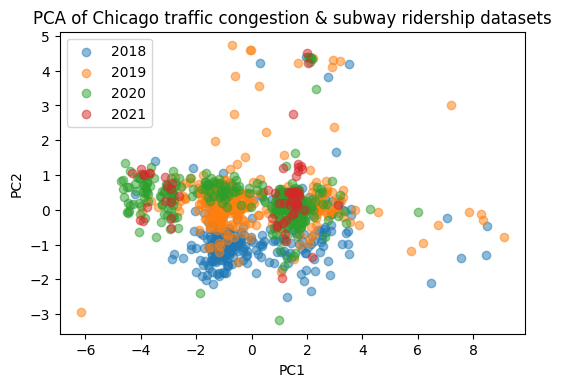

In [8]:
# cluster by year?
fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[X.dt.year == 2018,0], Y_r[X.dt.year == 2018,1], alpha=0.5, label='2018')
plt.scatter(Y_r[X.dt.year == 2019,0], Y_r[X.dt.year == 2019,1], alpha=0.5, label='2019')
plt.scatter(Y_r[X.dt.year == 2020,0], Y_r[X.dt.year == 2020,1], alpha=0.5, label='2020')
plt.scatter(Y_r[X.dt.year == 2021,0], Y_r[X.dt.year == 2021,1], alpha=0.5, label='2021')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Chicago traffic congestion & subway ridership datasets', fontsize=12);

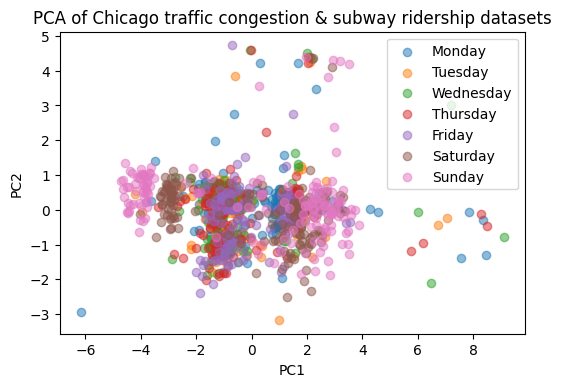

In [9]:
# cluster by day of week
fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[X.dt.day_of_week == 0,0], Y_r[X.dt.day_of_week == 0,1], alpha=0.5, label='Monday')
plt.scatter(Y_r[X.dt.day_of_week == 1,0], Y_r[X.dt.day_of_week == 1,1], alpha=0.5, label='Tuesday')
plt.scatter(Y_r[X.dt.day_of_week == 2,0], Y_r[X.dt.day_of_week == 2,1], alpha=0.5, label='Wednesday')
plt.scatter(Y_r[X.dt.day_of_week == 3,0], Y_r[X.dt.day_of_week == 3,1], alpha=0.5, label='Thursday')
plt.scatter(Y_r[X.dt.day_of_week == 4,0], Y_r[X.dt.day_of_week == 4,1], alpha=0.5, label='Friday')
plt.scatter(Y_r[X.dt.day_of_week == 5,0], Y_r[X.dt.day_of_week == 5,1], alpha=0.5, label='Saturday')
plt.scatter(Y_r[X.dt.day_of_week == 6,0], Y_r[X.dt.day_of_week == 6,1], alpha=0.5, label='Sunday')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Chicago traffic congestion & subway ridership datasets', fontsize=12);

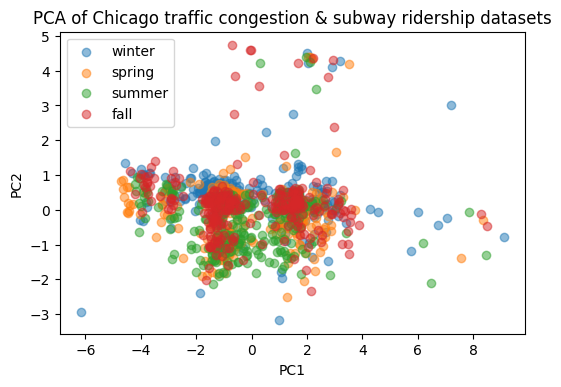

In [10]:
# define seasons by time of year, may be a day off sometimes due to leap years
winter_mask = (X.dt.strftime('%m-%d') >= '12-21') | ((X.dt.strftime('%m-%d') >= '01-01') & (X.dt.strftime('%m-%d') < '03-20'))
spring_mask = (X.dt.strftime('%m-%d') >= '03-20') & (X.dt.strftime('%m-%d') < '06-21')
summer_mask = (X.dt.strftime('%m-%d') >= '06-21') & (X.dt.strftime('%m-%d') < '09-22')
fall_mask = (X.dt.strftime('%m-%d') >= '09-22') & (X.dt.strftime('%m-%d') < '12-21')

# cluster by seasons
fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[winter_mask,0], Y_r[winter_mask,1], alpha=0.5, label='winter')
plt.scatter(Y_r[spring_mask,0], Y_r[spring_mask,1], alpha=0.5, label='spring')
plt.scatter(Y_r[summer_mask,0], Y_r[summer_mask,1], alpha=0.5, label='summer')
plt.scatter(Y_r[fall_mask,0], Y_r[fall_mask,1], alpha=0.5, label='fall')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Chicago traffic congestion & subway ridership datasets', fontsize=12);

## K-Means Clustering
[sklearn KMeans docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(Y_r)
kmeans_tr = KMeans(n_clusters=4, random_state=0).fit_transform(Y_r)

centroids_x = kmeans.cluster_centers_[0:5,0] # x-values of first 4 centroid points
centroids_y = kmeans.cluster_centers_[0:5,1] # y-values of first 4 centroid points

In [11]:
kmeans.labels_

array([1, 1, 2, ..., 3, 2, 2])

In [45]:
kmeans.cluster_centers_

array([[ 7.39247040e+01, -4.57016254e+00,  3.16030130e+00, ...,
        -1.61683560e-03, -4.23197623e-04,  9.05547366e-15],
       [-1.01445233e+01, -1.93485261e+00, -3.69362607e+00, ...,
         1.00533771e-05, -3.41919479e-05,  9.05547366e-15],
       [ 1.74190914e+01,  1.19491002e+00,  1.45869075e+00, ...,
         5.83324147e-05,  1.52963935e-04,  9.05547366e-15],
       [-3.46590428e+01,  4.11573534e+00,  9.69793159e+00, ...,
        -8.04354512e-05, -4.11058528e-04,  9.05547366e-15]])

In [55]:
kmeans_tr

array([[ 91.04819616,  28.68808942,  41.92759285,  41.14267129],
       [ 88.29543748,  29.98909659,  40.22174952,  43.99845625],
       [ 66.16190578,  44.29614338,  33.63882531,  63.29729641],
       ...,
       [115.12746946,  40.23689469,  60.49647695,  24.47755628],
       [ 72.81984027,  39.86713923,  31.76058745,  55.42630465],
       [ 66.62567277,  43.96312572,  31.54544886,  61.73653077]])

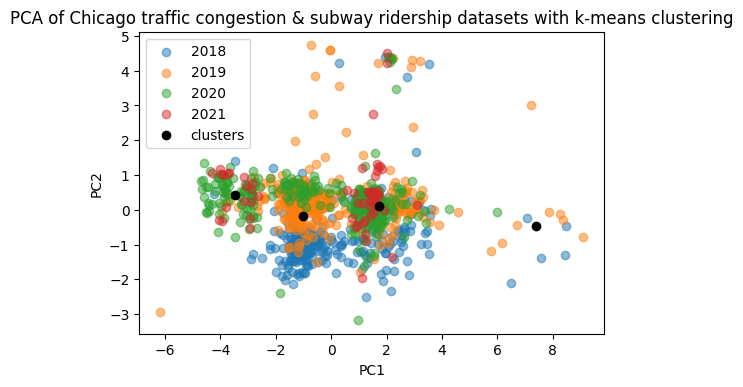

In [12]:
# cluster by year?
fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[X.dt.year == 2018,0], Y_r[X.dt.year == 2018,1], alpha=0.5, label='2018')
plt.scatter(Y_r[X.dt.year == 2019,0], Y_r[X.dt.year == 2019,1], alpha=0.5, label='2019')
plt.scatter(Y_r[X.dt.year == 2020,0], Y_r[X.dt.year == 2020,1], alpha=0.5, label='2020')
plt.scatter(Y_r[X.dt.year == 2021,0], Y_r[X.dt.year == 2021,1], alpha=0.5, label='2021')
plt.scatter(centroids_x, centroids_y, alpha=1, color='black', label='clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Chicago traffic congestion & subway ridership datasets with k-means clustering', fontsize=12);

Text(0.5, 1.0, 'K-Means clustering (n=4) and labeling of SRI and RRI data')

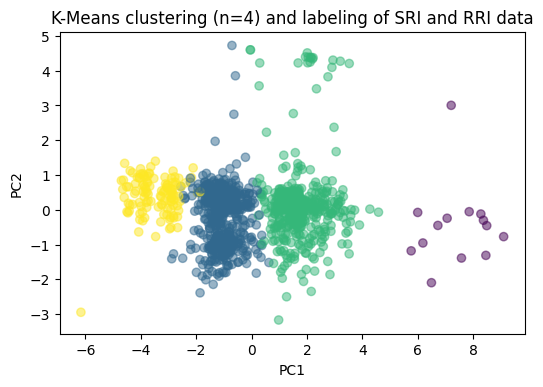

In [55]:
# clustered by kmeans labels
fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[:,0], Y_r[:,1], alpha=0.5, c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means clustering (n=4) and labeling of SRI and RRI data')

## Correlation between segments vs stations
[Pandas.DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr)

In [13]:
# calculate correlation matrix for 
corrm = Y.corr()
corrm.fillna(0, inplace=True) # where NaN, assume no correlation

In [14]:
# initialize PCA
corrm_pca = PCA()
corrm_Y = corrm_pca.fit_transform(X=corrm) # store as dataframe to view 

corrm_df_pca = pd.DataFrame(corrm_Y)
print(corrm_df_pca.shape)
corrm_df_pca.round(2).head()

(1190, 1190)


,0,1,2,3,4,5,6,7,8,9,...,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189
0,-1.89,-0.24,-0.23,0.08,0.45,-0.20,0.10,0.03,-0.05,-0.06,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
1,-1.59,1.62,2.24,-0.82,-0.42,-0.27,-0.04,0.09,-0.23,0.11,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
2,-1.26,-0.42,0.44,0.06,0.60,-0.11,0.15,-0.03,0.06,-0.09,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
3,0.12,2.05,-0.22,0.83,-0.08,-0.02,0.31,-0.11,0.14,-0.14,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
4,-1.06,-0.33,-0.73,-0.26,0.06,-0.05,-0.17,0.07,-0.12,-0.03,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0


In [15]:
# contribution of first 10 PCs
print(corrm_pca.explained_variance_ratio_.round(2)[:10])

[0.81 0.07 0.02 0.01 0.   0.   0.   0.   0.   0.  ]


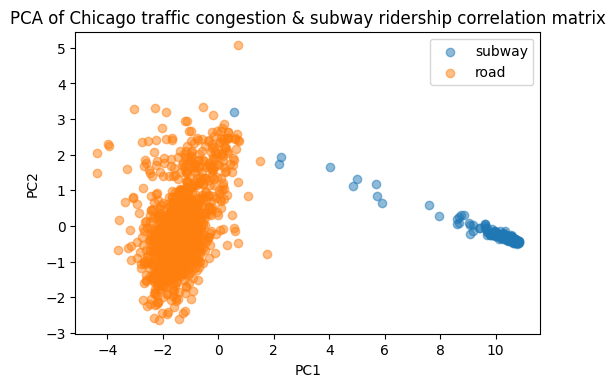

In [16]:
# separate station rows from segment rows
all_station_mask = ['station' in y for y in corrm.index]
all_segment_mask = ['segment' in y for y in corrm.index]

# cluster by segment & station
fig, ax = plt.subplots(dpi=100)
plt.scatter(corrm_Y[all_station_mask,0], corrm_Y[all_station_mask,1], alpha=0.5, label='subway')
plt.scatter(corrm_Y[all_segment_mask,0], corrm_Y[all_segment_mask,1], alpha=0.5, label='road')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Chicago traffic congestion & subway ridership correlation matrix', fontsize=12);

## Agglomerative Clustering
[sklearn docs](https://scikit-learn.org/0.15/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

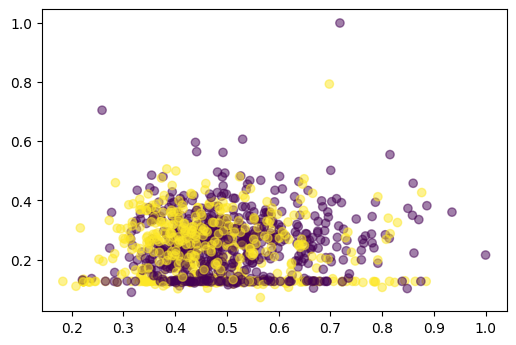

In [47]:
from sklearn.cluster import AgglomerativeClustering

# clustered by aggc, on data before reducing dimensionality with PCA
agg_c = AgglomerativeClustering().fit(Y)

fig, ax = plt.subplots(dpi=100)
plt.scatter(Y.iloc[:,0], Y.iloc[:,1], c=agg_c.labels_, alpha=0.5)

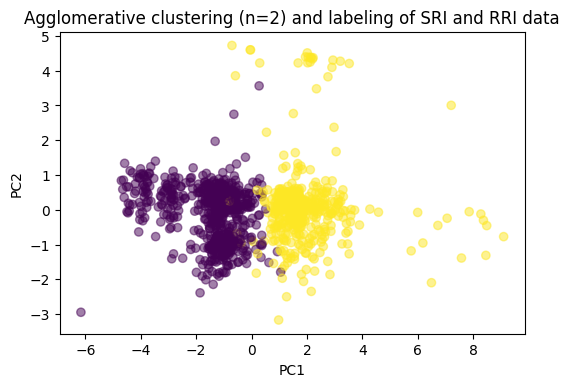

In [62]:
# clustered by aggc labels, on PCA basis
agg_c_pca = AgglomerativeClustering().fit(Y_r)

fig, ax = plt.subplots(dpi=100)
plt.scatter(Y_r[:,0], Y_r[:,1], c=agg_c_pca.labels_, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative clustering (n=2) and labeling of SRI and RRI data');